In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

<h1> Newton's theory of gravitation simulation for rocky planets</h1>

<p>Tranformation of the law of universal gravitation to vector form:</p>
    
$$F_{21}=-G\frac{m_1m_2}{|r_{12}|^2}\hat{r}_{12}$$

$$=$$

$$F_{21}=-G\frac{m_1m_2}{|r_{12}|^{3}}(r_2-r_1) $$


<p>Integration is made using the leapfrog technique:</p>

$$v_{i+\frac{1}{2}}=v_{i}+a_{i}\frac{\Delta t}{2}$$
$$x_{i+1}=x_{i}+v_{i+\frac{1}{2}}{\Delta t}$$
$$v_{i+1}=v_{i+\frac{1}{2}}+a_{i+1}\frac{\Delta t}{2}$$

In [3]:
G=6.67408*10**(-11)

#planet (and star) object

class planet():
    def __init__(self,name,r,v,m):
        self.name=name
        self.r=r #position vector
        self.v=v #velocity vector
        self.m=m #mass
        self.a=0
        self.hist=self.r # history of position
    
    def timestep(self,dt,sys):
        if isinstance(self.a, int):
            a=np.array([0.,0.])
            for i in sys:
                if i.name !=self.name:
                    a+= -G*i.m*(self.r-i.r)/(np.linalg.norm(self.r-i.r)**(3))
            self.a=a
            
        #leapfrog integration
        v12=self.v+self.a*dt/2
        self.r=self.r+v12*dt
        a=np.array([0.,0.])
        for i in sys:
            if i.name !=self.name:
                a+= -G*i.m*(self.r-i.r)/(np.linalg.norm(self.r-i.r)**(3))
            self.a=a
        
        self.v=v12+self.a*dt/2
        self.hist=np.vstack((self.hist,self.r))
    
    def __str__(self):
        return (f"position {self.r}, velocity {self.v}")
        
    

153632046529.00073
147958962501.18677


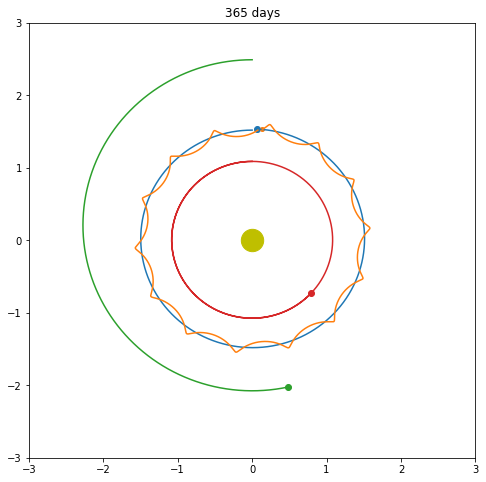

In [12]:
# planet(name,position,velocity,mass)
sun=planet("sun",np.array([0.,0.]),np.array([0.,0.]),1.9885*10**30)
earth=planet("earth",np.array([0.,152100000000]),np.array([-29300,0.]),5.97237*10**24)
moon=planet("moon",np.array([384399000.,152100000000]),np.array([-29300,-1022.]),7.342*10**22)
mars=planet("mars",np.array([0.,249200000000]),np.array([-22000,0. ]),6.4171*10**23)
venus=planet("venus",np.array([0.,108939000000]),np.array([-34780,0. ]),4.8675*10**24)
sys=[sun,earth,moon,mars,venus]

#initialyzing graphs
fig,ax=plt.subplots(figsize=(8,8))
eth=ax.scatter(earth.r[0]/(10*10**10),earth.r[1]/(10*10**10))
ehist,=ax.plot([0],[0])
mth=ax.scatter(moon.r[0]/(10*10**10),moon.r[1]/(10*10**10),s=16)
mhist,=ax.plot([0],[0])
math=ax.scatter(earth.r[0]/(10*10**10),earth.r[1]/(10*10**10))
mahist,=ax.plot([0],[0])
vth=ax.scatter(earth.r[0]/(10*10**10),earth.r[1]/(10*10**10))
vhist,=ax.plot([0],[0])
su=ax.scatter(0,0,s=500,c='y')

def start():
    ax.axis([-3,3,-3,3])
    eth.set_offsets([earth.r[0]/(10*10**10),earth.r[1]/(10*10**10)])
    mth.set_offsets([moon.r[0]/(10*10**10),moon.r[1]/(10*10**10)])
    math.set_offsets([mars.r[0]/(10*10**10),mars.r[1]/(10*10**10)])
    vth.set_offsets([venus.r[0]/(10*10**10),venus.r[1]/(10*10**10)])
    return eth,
    

#update and draw

def update(frame):
    for i in range(24):
        earth.timestep(3600,sys)
        moon.timestep(3600,sys)
        mars.timestep(3600,sys)
        venus.timestep(3600,sys)
    
    #if frame in [1,30,60,90,120,150,180,210,240,270,300,330]:
    #    print(earth)
    
    #distance beteween earth and moon
    dist=moon.r-earth.r
    disth=moon.hist-earth.hist    
    
    #draw update
    ax.set_title(f"{frame} days")
    
    eth.set_offsets([earth.r[0]/(10**11),earth.r[1]/(10**11)])
    ehist.set_data([earth.hist[:,0]/(10**11),earth.hist[:,1]/(10**11)])
    
    math.set_offsets([mars.r[0]/(10**11),mars.r[1]/(10**11)])
    mahist.set_data([mars.hist[:,0]/(10**11),mars.hist[:,1]/(10**11)])
    
    mth.set_offsets([earth.r[0]/(10**11)+dist[0]*2/(10**10),earth.r[1]/(10**11)+dist[1]*2/(10**10)])
    mhist.set_data([earth.hist[:,0]/(10**11)+disth[:,0]*2/(10**10),earth.hist[:,1]/(10**11)+disth[:,1]*2/(10**10)])
    
    vth.set_offsets([venus.r[0]/(10**11),venus.r[1]/(10**11)])
    vhist.set_data([venus.hist[:,0]/(10**11),venus.hist[:,1]/(10**11)])
    
    if frame==365:
        print(np.amax(np.linalg.norm(earth.hist,axis=1)))
        print(np.min(np.linalg.norm(earth.hist,axis=1)))
    
    return eth,

#animation
ani= FuncAnimation(fig, update, 366, blit=True,init_func=start, interval=30, repeat=False)
HTML(ani.to_html5_video())